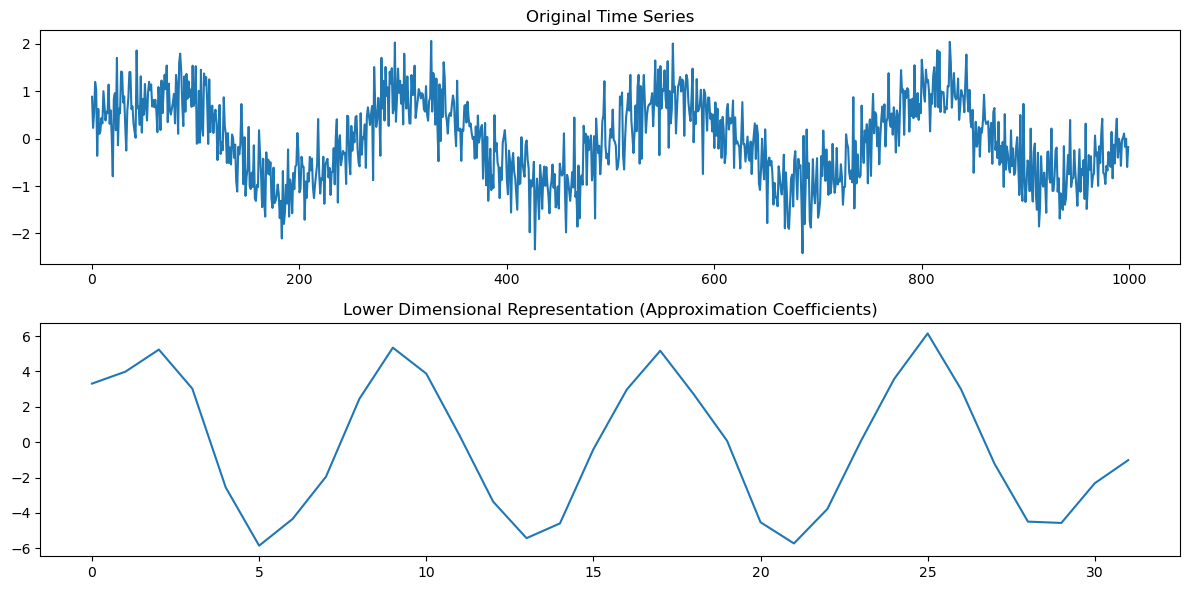

In [13]:
import pywt
import numpy as np
import matplotlib.pyplot as plt

# Generate example time series data
np.random.seed(0)
time_series = np.sin(np.linspace(0, 8 * np.pi, 1000)) + np.random.normal(0, 0.5, 1000)

# Perform a discrete wavelet transform
coeffs = pywt.wavedec(time_series, 'db1', level=5)

# Select the approximation coefficients (level 5 in this case)
lower_dim_representation = coeffs[0]

# Plot the original and lower-dimensional representation
plt.figure(figsize=(12, 6))

plt.subplot(2, 1, 1)
plt.plot(time_series)
plt.title('Original Time Series')

plt.subplot(2, 1, 2)
plt.plot(lower_dim_representation)
plt.title('Lower Dimensional Representation (Approximation Coefficients)')

plt.tight_layout()
plt.show()


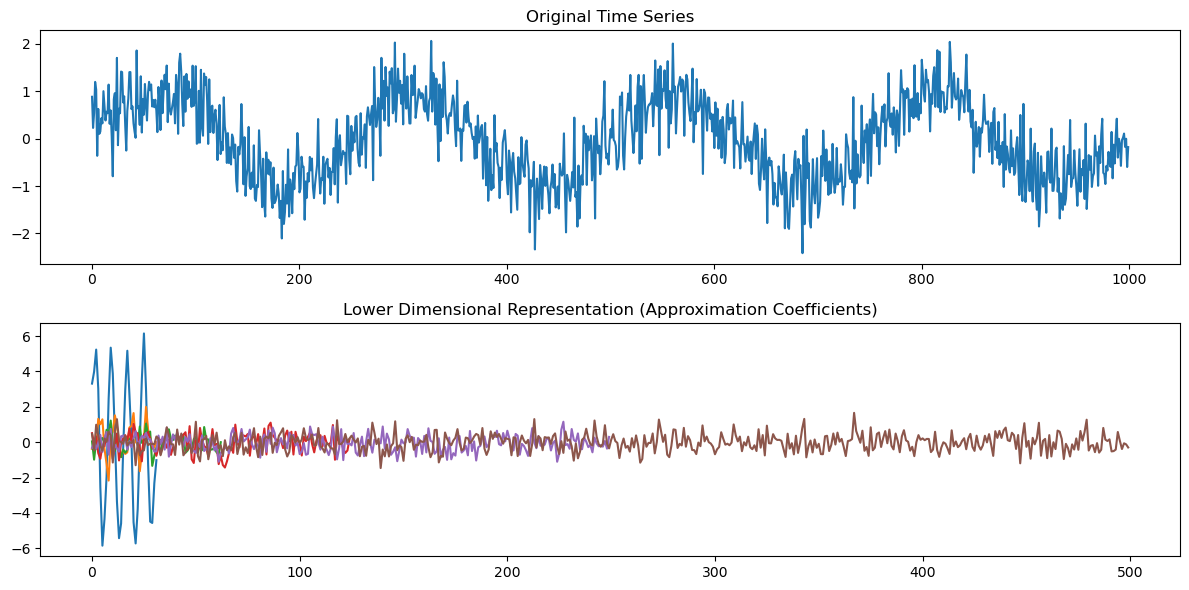

In [14]:
# Generate example time series data
np.random.seed(0)
time_series = np.sin(np.linspace(0, 8 * np.pi, 1000)) + np.random.normal(0, 0.5, 1000)

# Perform a discrete wavelet transform
coeffs = pywt.wavedec(time_series, 'db1', level=5)


# Select the approximation coefficients (level 5 in this case)
lower_dim_representation = coeffs[0]

# Plot the original and lower-dimensional representation
plt.figure(figsize=(12, 6))

plt.subplot(2, 1, 1)
plt.plot(time_series)
plt.title('Original Time Series')

plt.subplot(2, 1, 2)
for coeff in coeffs:
    plt.plot(coeff)
plt.title('Lower Dimensional Representation (Approximation Coefficients)')

plt.tight_layout()
plt.show()


In [15]:
import numpy as np
import pywt

def buffer(signal, numbuffer):
    """
    Buffer function to split signal into overlapping segments.
    """
    length = len(signal)
    step = numbuffer
    num_segments = (length - numbuffer) + 1
    segments = np.zeros((numbuffer, num_segments))

    for i in range(num_segments):
        segments[:, i] = signal[i:i + numbuffer]

    return segments

def dwtleader(signal_segment):
    """
    Perform discrete wavelet transform and return wavelet leaders.
    This is a simplified example.
    """
    coeffs = pywt.wavedec(signal_segment, 'db1')
    detail_coeffs = coeffs[1:]  # Ignore approximation coefficients at the highest level

    # Find the max in each set of coefficients (a simplification)
    leaders = [np.max(np.abs(c)) for c in detail_coeffs]
    h = [np.std(c) for c in detail_coeffs]  # An example statistic

    # For demonstration, we'll just return leaders and a dummy change point
    change_point = np.argmax(leaders)
    
    return leaders, h, change_point

def leaders(x, numbuffer):
    y = buffer(x, numbuffer)
    cp = np.zeros(y.shape[1])
    rh = np.zeros(y.shape[1])
    
    for kk in range(y.shape[1]):
        _, h, cptmp = dwtleader(y[:, kk])
        cp[kk] = cptmp
        rh[kk] = np.ptp(h)  # range in Python is a built-in function; use np.ptp for range of values
    
    return cp, rh

# Example usage:
x = np.sin(np.linspace(0, 8 * np.pi, 1000)) + np.random.normal(0, 0.5, 1000)
numbuffer = 50
cp, rh = leaders(x, numbuffer)

print("Change Points:", cp)
print("Range of h:", rh)


Change Points: [4. 0. 0. 4. 0. 0. 0. 3. 2. 3. 1. 3. 0. 0. 0. 0. 0. 0. 0. 3. 4. 3. 0. 3.
 0. 3. 1. 0. 4. 3. 4. 3. 2. 3. 4. 3. 4. 3. 0. 3. 2. 3. 4. 3. 0. 3. 0. 3.
 2. 3. 4. 3. 0. 3. 4. 0. 0. 4. 2. 4. 3. 4. 0. 4. 0. 4. 0. 4. 3. 4. 3. 4.
 3. 4. 0. 4. 3. 4. 3. 0. 0. 0. 0. 4. 3. 4. 3. 4. 3. 4. 3. 0. 0. 4. 3. 4.
 3. 4. 1. 4. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 4. 0. 0. 0.
 0. 0. 0. 0. 0. 3. 4. 3. 4. 0. 4. 0. 4. 0. 0. 0. 0. 3. 4. 0. 4. 3. 4. 3.
 4. 3. 0. 3. 4. 0. 4. 3. 0. 4. 0. 4. 0. 4. 4. 4. 0. 4. 3. 4. 3. 4. 1. 4.
 3. 4. 0. 4. 3. 4. 0. 4. 3. 4. 3. 4. 3. 0. 0. 4. 3. 4. 0. 4. 0. 4. 3. 0.
 0. 4. 3. 4. 3. 4. 1. 4. 3. 0. 3. 0. 0. 4. 3. 0. 4. 0. 4. 4. 4. 4. 0. 0.
 0. 4. 4. 0. 4. 4. 1. 0. 4. 4. 4. 4. 4. 0. 4. 4. 4. 4. 0. 4. 4. 4. 1. 4.
 0. 0. 4. 0. 0. 0. 0. 0. 0. 4. 4. 0. 4. 4. 1. 4. 4. 4. 4. 4. 4. 4. 4. 4.
 4. 4. 4. 4. 4. 4. 4. 4. 4. 3. 3. 4. 2. 0. 0. 0. 0. 3. 3. 4. 4. 3. 0. 0.
 4. 3. 4. 4. 0. 3. 4. 4. 4. 3. 4. 4. 4. 4. 4. 0. 0. 0. 4. 0. 0. 0. 0. 2.
 2. 2. 4. 1. 0. 0. 1. 2. 2. 2. 4. 2.

In [16]:
import numpy as np
import pymultifracs as pmf
import pywt

def buffer(signal, numbuffer):
    """
    Buffer function to split signal into overlapping segments.
    """
    length = len(signal)
    step = numbuffer
    num_segments = (length - numbuffer) + 1
    segments = np.zeros((numbuffer, num_segments))

    for i in range(num_segments):
        segments[:, i] = signal[i:i + numbuffer]

    return segments

def dwtleader(signal_segment):
    """
    Perform discrete wavelet transform and return wavelet leaders.
    """
    wt = pmf.WT1D(signal_segment, p=2)
    leaders = wt.leaders()
    change_point = np.argmax(leaders)
    h = leaders
    return leaders, h, change_point

def leaders(x, numbuffer):
    y = buffer(x, numbuffer)
    cp = np.zeros(y.shape[1])
    rh = np.zeros(y.shape[1])
    
    for kk in range(y.shape[1]):
        _, h, cptmp = dwtleader(y[:, kk])
        cp[kk] = cptmp
        rh[kk] = np.ptp(h)  # range in Python is a built-in function; use np.ptp for range of values
    
    return cp, rh

# Example usage:
x = np.sin(np.linspace(0, 8 * np.pi, 1000)) + np.random.normal(0, 0.5, 1000)
numbuffer = 50
cp, rh = leaders(x, numbuffer)

print("Change Points:", cp)
print("Range of h:", rh)


AttributeError: module 'pymultifracs' has no attribute 'WT1D'

In [35]:
import numpy as np
import pymultifracs
# from pymultifracs.leaders import dwtleader
# from pymultifracs.leaders import buffer as pmf_buffer
import pymultifracs.mfa as mfa
from pymultifracs.utils import build_q_log
import numpy as np
def buffer(signal, numbuffer):
    """
    Buffer function to split signal into overlapping segments.
    """
    length = len(signal)
    step = numbuffer
    num_segments = (length - numbuffer) + 1
    segments = np.zeros((numbuffer, num_segments))

    for i in range(num_segments):
        segments[:, i] = signal[i:i + numbuffer]

    return segments

def compute_wavelet_leaders(signal_segment):
    """
    Perform discrete wavelet transform and return wavelet leaders and cumulants.
    """

    dwt = mfa.mf_analysis_full(signal_segment,
    scaling_ranges=[(1, 4)],
     q=build_q_log(1, 10, 20),
    n_cumul=2,
    )
    sf, cumul, mfs, hmin = dwt
    # # Compute wavelet leaders using pymultifracs
    # leaders, _ = dwtleader(signal_segment, wavelet='db1', level=5)
    
    # # Calculate cumulants from wavelet leaders
    # cumulants = pymultifracs.cumulants_from_leaders(leaders, moment=2)
    
    # Range of the leaders
    # h = np.ptp(leaders)
    
    return sf, sf.H, cumul

def leaders(x, numbuffer):
    y = x#= buffer(x, numbuffer)
    if y.ndim <=1:
        y = y[:,None]
    cp = np.zeros(y.shape[1])
    rh = np.zeros(y.shape[1])
    
    for kk in range(y.shape[1]):
        _, h, cumulants = compute_wavelet_leaders(y[:, kk])
        # print(cumulants)
        cp[kk] = cumulants.log_cumulants[1]  # The second cumulant
        rh[kk] = h  # Range of the leaders
    
    return cp, rh

# Example usage:
x = np.sin(np.linspace(0, 8 * np.pi, 32000)) + np.random.normal(0, 0.5, 32000)
numbuffer = 50
cp, rh = leaders(x, numbuffer)

print("Cumulants:", cp)
print("Range of h:", rh)


Cumulants: [-0.05238292]
Range of h: [-0.50474015]
